<a href="https://colab.research.google.com/github/kiddojazz/Adding-Salt-Pepper-Noise-to-Image/blob/master/Time_Series_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: This program uses the artificial intelligence (RNN- Recurrent Neural Network) called Long Short Memory (LSTM)

For this project we would be using the Microsoft Corp MSFT for 60 days stock price.


# **STEP 1:** Import all necessary Libraries

In [ ]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime
plt.style.use("fivethirtyeight")

In [ ]:
#!pip install pandas_datareader
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
#If your pandas_datareader keep poping error then you will need to upgrade to the latest version

# **STEP 2:** Get the Data from Yahoo Finance site

In [ ]:
#Get the stock for MSFT
MSFT = web.get_data_yahoo("MSFT",
                         start=datetime.datetime(2010, 1, 1),
                         end=datetime.datetime(2021,12,31))

In [ ]:
MSFT.head(n=20) #Top 20 row 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.904982
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.912699
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.765955
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.518797
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.680988
2010-01-11,30.760000,30.120001,30.709999,30.270000,68754700.0,23.379766
2010-01-12,30.400000,29.910000,30.150000,30.070000,65912100.0,23.225292
2010-01-13,30.520000,30.010000,30.260000,30.350000,51863500.0,23.441555
2010-01-14,31.100000,30.260000,30.309999,30.959999,63228100.0,23.912699


In [ ]:
MSFT.head

<bound method NDFrame.head of                   High         Low  ...      Volume   Adj Close
Date                                ...                        
2010-01-04   31.100000   30.590000  ...  38409100.0   23.904982
2010-01-05   31.100000   30.639999  ...  49749600.0   23.912699
2010-01-06   31.080000   30.520000  ...  58182400.0   23.765955
2010-01-07   30.700001   30.190001  ...  50559700.0   23.518797
2010-01-08   30.879999   30.240000  ...  51197400.0   23.680988
...                ...         ...  ...         ...         ...
2021-12-17  324.920013  317.250000  ...  47750300.0  323.799988
2021-12-20  322.799988  317.570007  ...  28326500.0  319.910004
2021-12-21  327.730011  319.799988  ...  24740600.0  327.290009
2021-12-22  333.609985  325.750000  ...  24831500.0  333.200012
2021-12-23  336.390015  332.730011  ...  19611200.0  334.690002

[3016 rows x 6 columns]>

While closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings. Since the adjusted closing price begins where the closing price ends, it can be called a more accurate measure of stocks' value.

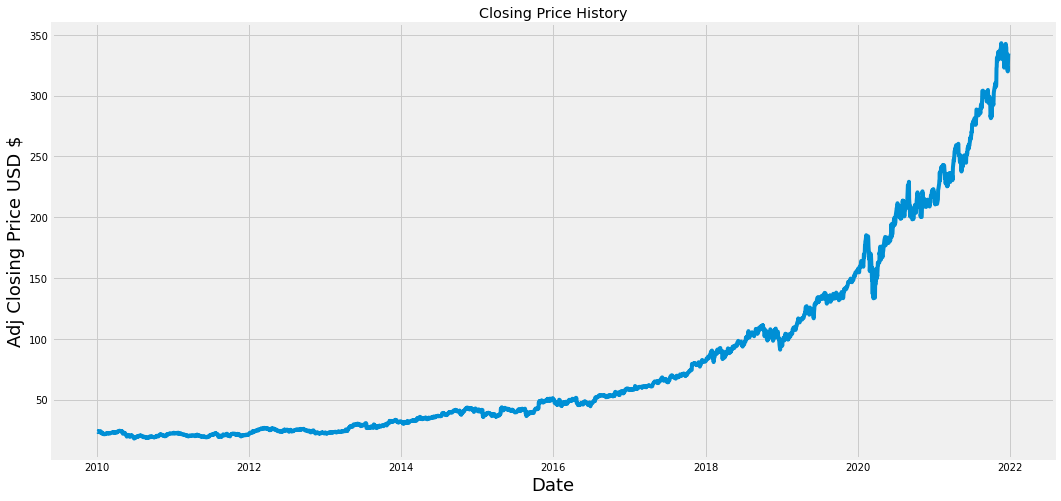

In [ ]:
#Visualization of the Adj Closin
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(MSFT["Adj Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Closing Price USD $", fontsize=18)
plt.show()

# **STEP 3:** Create a New DataFrame with the "Adj Close" as the Column needed.

In [ ]:
#Create a new dataframe with only the Adj Close Column
data = MSFT.filter(["Adj Close"])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) #This is use to train 80% of the dataset

training_data_len

2413

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
#Scaling the data means you are actually standardizing your data

array([[0.01835624],
       [0.01837998],
       [0.0179287 ],
       ...,
       [0.95134919],
       [0.96952409],
       [0.97410622]])

In [ ]:
#Create the training model for the dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01835624, 0.01837998, 0.0179287 , 0.01716862, 0.0176674 ,
       0.01674106, 0.01626601, 0.01693108, 0.01837998, 0.01814248,
       0.01871253, 0.01750115, 0.01612352, 0.01362947, 0.01448457,
       0.01491211, 0.01531589, 0.01410452, 0.01177676, 0.01232306,
       0.01244184, 0.01284564, 0.01096919, 0.01139673, 0.01068415,
       0.01137294, 0.01132546, 0.01163426, 0.01118297, 0.01249545,
       0.01306817, 0.013975  , 0.01349773, 0.01340228, 0.01244773,
       0.01316364, 0.01309206, 0.01325909, 0.01409431, 0.01275794,
       0.01275794, 0.01316364, 0.01306817, 0.01316364, 0.01356931,
       0.013975  , 0.01447615, 0.01469093, 0.01473866, 0.01492955,
       0.01555   , 0.0155023 , 0.01545455, 0.01547842, 0.01614661,
       0.01559773, 0.01645683, 0.01562159, 0.01545455, 0.0158841 ])]
[0.01473865584297731]

[array([0.01835624, 0.01837998, 0.0179287 , 0.01716862, 0.0176674 ,
       0.01674106, 0.01626601, 0.01693108, 0.01837998, 0.01814248,
       0.01871253, 0.01750115, 0.01

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data to a 3 dimensional shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
#Now you'll notice it a 3 dimensional shape

(2353, 60, 1)

# **STEP 4:** Create your Model

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))#50 means the no of input neurons
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))# Final output  

In [ ]:
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)#Batch size the number of Batch per training, while epochs is the number of Iteration

Epoch 1/5
2353/2353 [==============================] - 76s 31ms/step - loss: 1.4837e-04
Epoch 2/5
2353/2353 [==============================] - 69s 29ms/step - loss: 7.2891e-05
Epoch 3/5
2353/2353 [==============================] - 71s 30ms/step - loss: 5.3961e-05
Epoch 4/5
2353/2353 [==============================] - 71s 30ms/step - loss: 5.1106e-05
Epoch 5/5
2353/2353 [==============================] - 70s 30ms/step - loss: 3.8379e-05


In [ ]:
 #Create the testing data set
 #Create a new array containing scaled values from index 1543 to 2003
 test_data = scaled_data[training_data_len - 60: , :]
 #Create the data sets x_test and y_test
 x_test = []
 y_test = dataset[training_data_len:, :]
 for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Evaluate the model: Getting the root square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

16.924483341957206

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


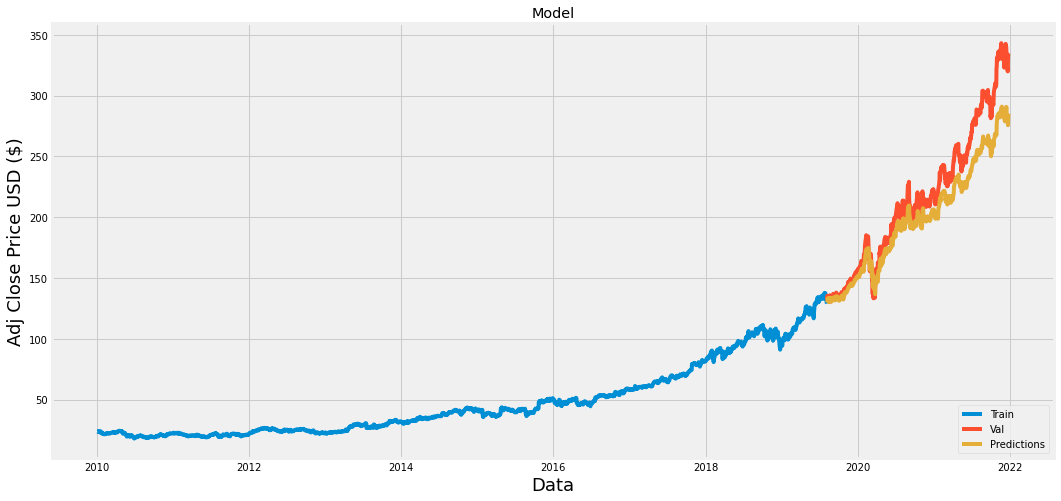

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Adj Close Price USD ($)", fontsize=18)
plt.plot(train["Adj Close"])
plt.plot(valid[["Adj Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [ ]:
#Show the valid and predicted prices
valid
#This compares between the "Adj Close" and "Predictions"


,Adj Close,Predictions
Date,,
2019-08-06,131.284821,129.566650
2019-08-07,131.859924,129.867065
2019-08-08,135.378647,130.716125
2019-08-09,134.228485,133.080139
2019-08-12,132.356995,133.441711
...,...,...
2021-12-17,323.799988,279.516083
2021-12-20,319.910004,277.692108
2021-12-21,327.290009,275.651794


In [ ]:
from os import X_OK
#Get the stock for MSFT
MSFT_Quote = web.get_data_yahoo("MSFT",
                         start=datetime.datetime(2010, 1, 1),
                         end=datetime.datetime(2019,12,17))
#Create a new dataframe
new_df = MSFT_Quote.filter(["Adj Close"])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print("Predicted ADj Close:", pred_price)

Predicted ADj Close: [[148.18307]]


In [ ]:
#Let compare the priced price with the actual price from the Dataset
MSFT_Quote = web.get_data_yahoo("MSFT",
                         start=datetime.datetime(2019,12,18),
                         end=datetime.datetime(2019,12,18))
MSFT_Quote["Adj Close"]

Date
2019-12-18    151.482025
Name: Adj Close, dtype: float64